In [1]:
using DifferentialEquations, Plots, Optim, Dates, DiffEqParamEstim, Flux, DiffEqFlux

In [54]:
mutable struct saver
    losses::Array{Float64,1}
    l2s::Array{Float64,1}
    times::Array{Dates.Time,1}
    count_epochs::Int128
end
function saver(n_epochs)
    losses = zeros(n_epochs)
    l2s = zeros(n_epochs)
    times = fill(Dates.Time(Dates.now()),n_epochs)
    count_epochs = 0
    return saver(losses,l2s,times,count_epochs)
end
function update_saver(saver, loss_i, l2_i, time_i)
    epoch_i = saver.count_epochs
    saver.losses[epoch_i] = loss_i
    saver.l2s[epoch_i] = l2_i
    saver.times[epoch_i] = time_i
end

update_saver (generic function with 1 method)

┌ Warning: The overloading form for Jacobians is deprecated. Use the DiffEqFunction
└ @ DiffEqBase /Users/eroesch/.julia/packages/DiffEqBase/BvErs/src/diffeqfunction.jl:584


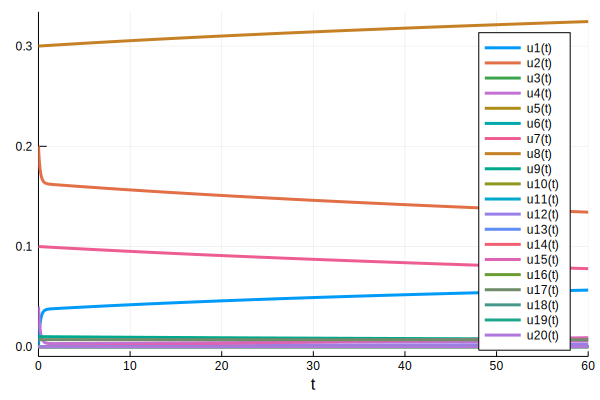

In [55]:
const k1=.35e0
const k2=.266e2
const k3=.123e5
const k4=.86e-3
const k5=.82e-3
const k6=.15e5
const k7=.13e-3
const k8=.24e5
const k9=.165e5
const k10=.9e4
const k11=.22e-1
const k12=.12e5
const k13=.188e1
const k14=.163e5
const k15=.48e7
const k16=.35e-3
const k17=.175e-1
const k18=.1e9
const k19=.444e12
const k20=.124e4
const k21=.21e1
const k22=.578e1
const k23=.474e-1
const k24=.178e4
const k25=.312e1

function f(dy,y,p,t)
 r1  = k1 *y[1]
 r2  = k2 *y[2]*y[4]
 r3  = k3 *y[5]*y[2]
 r4  = k4 *y[7]
 r5  = k5 *y[7]
 r6  = k6 *y[7]*y[6]
 r7  = k7 *y[9]
 r8  = k8 *y[9]*y[6]
 r9  = k9 *y[11]*y[2]
 r10 = k10*y[11]*y[1]
 r11 = k11*y[13]
 r12 = k12*y[10]*y[2]
 r13 = k13*y[14]
 r14 = k14*y[1]*y[6]
 r15 = k15*y[3]
 r16 = k16*y[4]
 r17 = k17*y[4]
 r18 = k18*y[16]
 r19 = k19*y[16]
 r20 = k20*y[17]*y[6]
 r21 = k21*y[19]
 r22 = k22*y[19]
 r23 = k23*y[1]*y[4]
 r24 = k24*y[19]*y[1]
 r25 = k25*y[20]

 dy[1]  = -r1-r10-r14-r23-r24+
          r2+r3+r9+r11+r12+r22+r25
 dy[2]  = -r2-r3-r9-r12+r1+r21
 dy[3]  = -r15+r1+r17+r19+r22
 dy[4]  = -r2-r16-r17-r23+r15
 dy[5]  = -r3+r4+r4+r6+r7+r13+r20
 dy[6]  = -r6-r8-r14-r20+r3+r18+r18
 dy[7]  = -r4-r5-r6+r13
 dy[8]  = r4+r5+r6+r7
 dy[9]  = -r7-r8
 dy[10] = -r12+r7+r9
 dy[11] = -r9-r10+r8+r11
 dy[12] = r9
 dy[13] = -r11+r10
 dy[14] = -r13+r12
 dy[15] = r14
 dy[16] = -r18-r19+r16
 dy[17] = -r20
 dy[18] = r20
 dy[19] = -r21-r22-r24+r23+r25
 dy[20] = -r25+r24
end

function f(::Type{Val{:jac}},J,y,p,t)
      J .= 0.0
      J[1,1]   = -k1-k10*y[11]-k14*y[6]-k23*y[4]-k24*y[19]
      J[1,11]  = -k10*y[1]+k9*y[2]
      J[1,6]   = -k14*y[1]
      J[1,4]   = -k23*y[1]+k2*y[2]
      J[1,19]  = -k24*y[1]+k22
      J[1,2]   = k2*y[4]+k9*y[11]+k3*y[5]+k12*y[10]
      J[1,13]  = k11
      J[1,20]  = k25
      J[1,5]   = k3*y[2]
      J[1,10]  = k12*y[2]

      J[2,4]   = -k2*y[2]
      J[2,5]   = -k3*y[2]
      J[2,11]  = -k9*y[2]
      J[2,10]  = -k12*y[2]
      J[2,19]  = k21
      J[2,1]   = k1
      J[2,2]   = -k2*y[4]-k3*y[5]-k9*y[11]-k12*y[10]

      J[3,1]   = k1
      J[3,4]   = k17
      J[3,16]  = k19
      J[3,19]  = k22
      J[3,3]   = -k15

      J[4,4]   = -k2*y[2]-k16-k17-k23*y[1]
      J[4,2]   = -k2*y[4]
      J[4,1]   = -k23*y[4]
      J[4,3]   = k15

      J[5,5]   = -k3*y[2]
      J[5,2]   = -k3*y[5]
      J[5,7]   = 2k4+k6*y[6]
      J[5,6]   = k6*y[7]+k20*y[17]
      J[5,9]   = k7
      J[5,14]  = k13
      J[5,17]  = k20*y[6]

      J[6,6]   = -k6*y[7]-k8*y[9]-k14*y[1]-k20*y[17]
      J[6,7]   = -k6*y[6]
      J[6,9]   = -k8*y[6]
      J[6,1]   = -k14*y[6]
      J[6,17]  = -k20*y[6]
      J[6,2]   = k3*y[5]
      J[6,5]   = k3*y[2]
      J[6,16]  = 2k18

      J[7,7]   = -k4-k5-k6*y[6]
      J[7,6]   = -k6*y[7]
      J[7,14]  = k13

      J[8,7]   = k4+k5+k6*y[6]
      J[8,6]   = k6*y[7]
      J[8,9]   = k7

      J[9,9]   = -k7-k8*y[6]
      J[9,6]   = -k8*y[9]

      J[10,10] = -k12*y[2]
      J[10,2]  = -k12*y[10]+k9*y[11]
      J[10,9]  = k7
      J[10,11] = k9*y[2]

      J[11,11] = -k9*y[2]-k10*y[1]
      J[11,2]  = -k9*y[11]
      J[11,1]  = -k10*y[11]
      J[11,9]  = k8*y[6]
      J[11,6]  = k8*y[9]
      J[11,13] = k11

      J[12,11] = k9*y[2]
      J[12,2]  = k9*y[11]

      J[13,13] = -k11
      J[13,11] = k10*y[1]
      J[13,1]  = k10*y[11]

      J[14,14] = -k13
      J[14,10] = k12*y[2]
      J[14,2]  = k12*y[10]

      J[15,1]  = k14*y[6]
      J[15,6]  = k14*y[1]

      J[16,16] = -k18-k19
      J[16,4]  = k16

      J[17,17] = -k20*y[6]
      J[17,6]  = -k20*y[17]

      J[18,17] = k20*y[6]
      J[18,6]  = k20*y[17]

      J[19,19] = -k21-k22-k24*y[1]
      J[19,1]  = -k24*y[19]+k23*y[4]
      J[19,4]  = k23*y[1]
      J[19,20] = k25

      J[20,20] = -k25
      J[20,1]  = k24*y[19]
      J[20,19] = k24*y[1]

      return
end
u0 = zeros(20)
u0[2]  = 0.2
u0[4]  = 0.04
u0[7]  = 0.1
u0[8]  = 0.3
u0[9]  = 0.01
u0[17] = 0.007
tspan = (0.0,60.0)
datasize = 1000
t = range(tspan[1], tspan[2], length = datasize)
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Rodas4(), abstol=1/10^14, reltol=1/10^14, saveat = t)
ode_data = Array(sol)
plot(sol)

In [56]:
# Building a neural ODE 
# Derivative is modeled by a neural net. Chain concatinates the functions ode function and two dense layers.
dudt = Chain(x -> x.^3,
       Dense(2,50,tanh),
       Dense(50,2))
# Parameters of the model which are to be learnt. They are: W1 (2x50), b1 (50), W2 (50x2), b2 (2)
ps = Flux.params(dudt)
# Getting loss function from two stage collocation function
function node_two_stage_function(model, x, tspan, saveat, ode_data,
            args...; kwargs...)
  print("hi")
  dudt_(du, u, p, t) = du .= model(u)
  print("hi2")
  prob_fly = ODEProblem(dudt_, x, tspan)
  print("hi3")
  two_stage_method(prob_fly, saveat, ode_data)
    print("hi4")
end

node_two_stage_function (generic function with 1 method)

In [57]:
loss_n_ode = node_two_stage_function(dudt, u0, tspan, t, ode_data, Rodas4(), abstol=1/10^14, reltol=1/10^14)
# LinearAlgebra.LAPACKException(2) here: https://github.com/LislPisl/DiffEqParamEstim.jl/blob/master/src/two_stage_method.jl , line 68
# solve: increase data size

hihi2hi3hi4

In [65]:
a()=loss_n_ode.cost_function(ps)

a (generic function with 1 method)

In [66]:
a() 

ErrorException: type Nothing has no field cost_function

In [62]:
#  loss function
two_stage_loss_fct()=loss_n_ode.cost_function(ps)
# Defining anonymous function for the neural ODE with the model. in: u0, out: solution with current params.
n_ode = x->neural_ode(dudt, x, tspan, Rodas4(), saveat=t, abstol=1/10^14, reltol=1/10^14)
n_epochs = 5000
verify = 50 # for <verify>th epoch the L2 is calculated  
data1 = Iterators.repeated((), n_epochs)
opt1 = ADAM(0.1)
sa = saver(n_epochs)
L2_loss_fct() = sum(abs2,ode_data .- n_ode(u0))
# Callback function to observe two stage training.
cb1 = function ()
    sa.count_epochs = sa.count_epochs +  1
    if mod(sa.count_epochs-1, verify)==0
        update_saver(sa, Tracker.data(two_stage_loss_fct()),Tracker.data(L2_loss_fct()),Dates.Time(Dates.now()))
        # println("\"",Tracker.data(two_stage_loss_fct()),"\" \"",Dates.Time(Dates.now()),"\";")
    else
        update_saver(sa, Tracker.data(two_stage_loss_fct()),0,Dates.Time(Dates.now()))
        # println("\"",Tracker.data(two_stage_loss_fct()),"\" \"",Dates.Time(Dates.now()),"\";")
    end
end

#71 (generic function with 1 method)

In [59]:
# train n_ode with collocation method
@time Flux.train!(two_stage_loss_fct, ps, data1, opt1, cb = cb1)
pred = n_ode(u0)

ErrorException: type Nothing has no field cost_function